# Introduction
geomockimages is about the (fast) creation of geospatial images for testing purposes. This makes it unnecessary to create 
actual image files to test if an image processing function works in general. The mock images are simple, they represent some aspects
of geospatial imagery, but are far from realistic. The focus here is on fast - image creation therefore uses simple maths and tools.

We'll start with a 4-band BGRN radiance/reflectance image. Optical images are default behaviour of GeoMockImage.

In [16]:
from pathlib import Path
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.transform import from_origin
from geomockimages.imagecreator import GeoMockImage

In [17]:
test_image, _ = GeoMockImage(
    300,
    200,
    4,
    "uint16",
    out_dir=Path("."),
    crs=4326,
        nodata=0,
        nodata_fill=0,
        cog=False,
).create(
        transform=from_origin(13.428596, 52.494384, 0.000006, 0.000006),
    )

In [18]:
img = rio.open(test_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


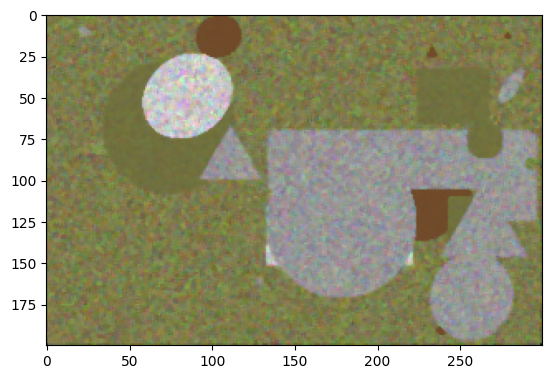

<Axes: >

In [19]:
show(np.rint(img.read(([3,2,1])) * 0.25).astype(int)) # Need to read the RGB bands in order for visualisation

Above a simplified visualisation without any proper stretching. Point is the image has values similar to what a radiance or reflectance image would show.

Such an image can e.g. be used to test if an NDVI implementation behaves in general as expected.

In [23]:
with rio.open(test_image) as src:
    band_red = src.read(3)

with rio.open(test_image) as src:
    band_nir = src.read(4)

# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

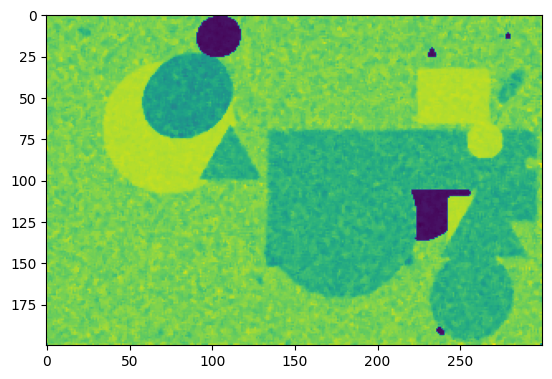

<Axes: >

In [24]:
show(ndvi)

Now it is possible to put the following statement into a unit test to make sure the NDVI function produces the expected value range.

In [28]:
assert ndvi.min() > -1.0 and ndvi.max() < 1.0